<a href="https://colab.research.google.com/github/jiiiisoo/deeplearning_yonsei/blob/main/Malaria%20cell%20image%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malaria cell image



In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use following command to install cv2 package
# pip install opencv-python
import cv2

### Displaying Uninfected and Infected Cell tissues


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -uq "/content/drive/MyDrive/deeplearning_HW/HW5/cell_images.zip" -d "/content/drive/MyDrive/deeplearning_HW/HW5"

Mounted at /content/drive


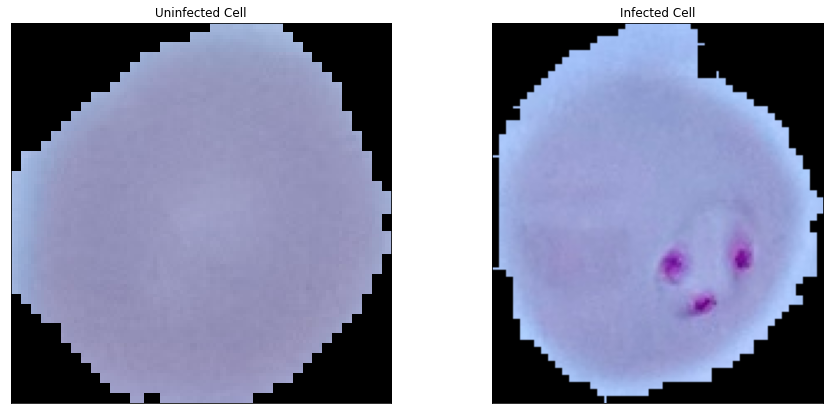

In [ ]:
upic='/content/drive/MyDrive/deeplearning_HW/HW5/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
apic='/content/drive/MyDrive/deeplearning_HW/HW5/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

### Dividing Dataset into two folders train and test

In [ ]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning_HW/HW5/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/deeplearning_HW/HW5/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [ ]:
# define the keras model
model=models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)      

In [ ]:
#@title 기본 제목 텍스트
# model fit
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
history = model.fit(trainDatagen, epochs=10, validation_data=(valDatagen))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1378/1378 [==============================] - 72s 52ms/step - loss: 0.4106 - accuracy: 0.7726 - val_loss: 0.1938 - val_accuracy: 0.9434
Epoch 2/10
1378/1378 [==============================] - 72s 52ms/step - loss: 0.1488 - accuracy: 0.9526 - val_loss: 0.1853 - val_accuracy: 0.9428
Epoch 3/10
1378/1378 [==============================] - 71s 51ms/step - loss: 0.1317 - accuracy: 0.9576 - val_loss: 0.2075 - val_accuracy: 0.9241
Epoch 4/10
1378/1378 [==============================] - 70s 51ms/step - loss: 0.1221 - accuracy: 0.9601 - val_loss: 0.1898 - val_accuracy: 0.9450
Epoch 5/10
1378/1378 [==============================] - 70s 51ms/step - loss: 0.1139 - accuracy: 0.9626 - val_loss: 0.1984 - val_accuracy: 0.9388
Epoch 6/10
1378/1378 [==============================] - 70s 51ms/step - loss: 0.1056 - accuracy: 0.9642 - val_loss: 0.1931 - val_accuracy: 0.9445
Epoch 7/10
1378/1378 [==============================] - 70s 51ms/step - loss: 0.1001 - accuracy: 0.9661 - val_loss: 0.1990 - val_accura

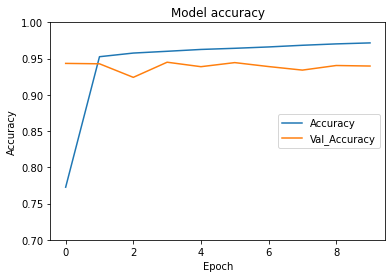

In [ ]:
# report accuracy from training/test data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7,1.0])
plt.legend(['Accuracy', 'Val_Accuracy'], loc='center right')